# HyperDualNumbers.jl

Created using Julia v0.3.7 by Jeremy Morton. 
The package can be added using the Pkg.add() command

# Overview
HyperDualNumbers.jl is a package that can be used to evaluate first and second derivatives numerically with a high degree of accuracy.  Derivative estimation with hyper-dual numbers is not plagued by the cancellation errors that affect other derivative estimates such as forward difference and complex step.

For more background on Hyper-Dual Numbers, see [this paper](https://adl.stanford.edu/hyperdual/Fike_AIAA-2011-886.pdf) by Jeffrey Fike and Juan Alonso in the Stanford Aero/Astro Department.

# Examples
Let's evaluate the derivatives of the following function at x = 1.5:
$$f(x) = \frac{e^x}{\sqrt{sin(x)^3 + cos(x)^3}}$$
The analytical expressions for the first and second derivatives of this function are defined in the paper linked above.

In [1]:
using HyperDualNumbers;

# Define function and its derivatives
f(x) = e^x / (sqrt(sin(x)^3 + cos(x)^3))

df(x) = e^x*(3*cos(x) + 5*cos(3*x) + 9*sin(x) + sin(3*x))/
(8*(sin(x)^3 + cos(x)^3)^1.5)

d2f(x) = e^x*(130 - 12*cos(2*x) + 30*cos(4*x) + 12*cos(6*x) -
111*sin(2*x) + 48*sin(4*x) + 5*sin(6*x))/(64*(sin(x)^3 + cos(x)^3)^2.5);


Now let us compare the analytical and numerical values. To define a hyper-dual number, use the command `hyper(x, h, h, 0.0)`, where x is the point where the derivatives will be computed, and h is the step size.

In [2]:
# Define step size and evaluation point
h = 1.0
x = 1.5

# Calculate function value
t0 = hyper(x, h, h, 0)
@show y = f(t0)
@show df(x)
@show d2f(x);

y = f(t0) => 4.497780053946162 + 4.05342789389862ϵ1 + 4.05342789389862ϵ2 + 9.463073681596601ϵ1ϵ2
df(x) => 4.05342789389862
d2f(x) => 9.463073681596601


The first derivative estimate is given by $\frac{\epsilon_1}{h}$ or $\frac{\epsilon_2}{h}$, and the second derivative estimate is given by $\frac{\epsilon_1 \epsilon_2}{h^2}$.  The $\epsilon$ values can be accessed directly by the `eps1()`, `eps2()`, and `eps1eps2()` commands.

As a final example, we will compare the performance of hyperdual numbers to other numerical derivative estimates.

In [3]:
# Define array of step sizes
hvals = logspace(-1, -30, 30)

# Store true derivative values
fprime = df(x)
f2prime = d2f(x)

# Initialize arrays to hold errors
cs_error = zeros(30, 2) # Complex step
fd_error = zeros(30, 2) # Forward difference
cd_error = zeros(30, 2) # Central difference
hd_error = zeros(30, 2) # Hyper-dual

for i = 1:30
    h = hvals[i] # step size
    
    # Complex step errors
    fp = imag(f(x + h*im))/h
    f2p = 2*(f(x) - real(f(x + h*im)))/h^2
    cs_error[i, 1] = max(1e-16, abs(fp - fprime)/fprime)
    cs_error[i, 2] = max(1e-16, abs(f2p - f2prime)/f2prime)
    
    # Forward difference errors
    fp = (f(x + h) - f(x))/h
    f2p = (f(x + 2*h) - 2*f(x + h) + f(x))/h^2
    fd_error[i, 1] = max(1e-16, abs(fp - fprime)/fprime)
    fd_error[i, 2] = max(1e-16, abs(f2p - f2prime)/f2prime)
    
    # Central difference errors
    fp = (f(x + h) - f(x - h))/(2*h)
    f2p = (f(x + h) - 2*f(x) + f(x - h))/h^2
    cd_error[i, 1] = max(1e-16, abs(fp - fprime)/fprime)
    cd_error[i, 2] = max(1e-16, abs(f2p - f2prime)/f2prime)
    
    # Hyper-dual errors
    t0 = hyper(x, h, h, 0)
    hd_error[i, 1] = max(1e-16, abs(eps1(f(t0))/h - fprime)/fprime)
    hd_error[i, 2] = max(1e-16, abs(eps1eps2(f(t0))/h^2 - f2prime)/f2prime)
end

Now let us plot the calculated errors against step size.  As you will see, the use of hyper-dual numbers leads to an almost exact approximation of the derivatives, regardless of the step size.

In [4]:
using PyPlot;

INFO: Loading help data...


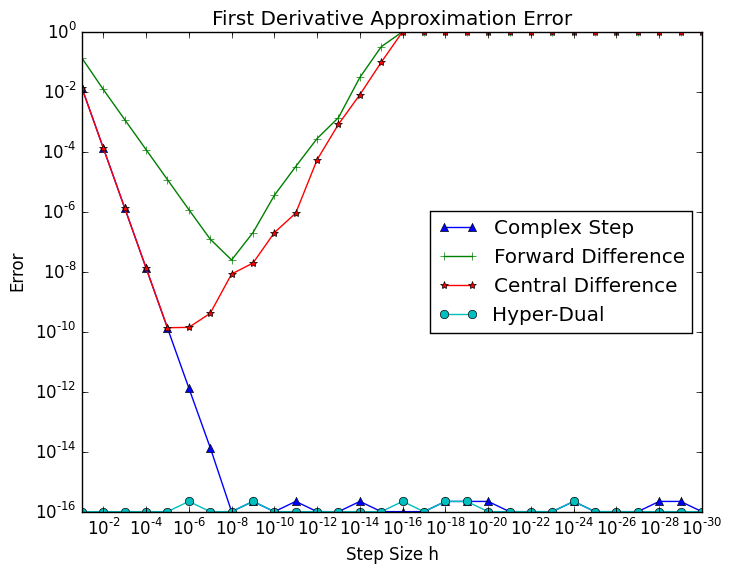

In [5]:
loglog(hvals, cs_error[:, 1],"-^", label="Complex Step")
loglog(hvals, fd_error[:, 1],"-+", label="Forward Difference")
loglog(hvals, cd_error[:, 1],"-*", label="Central Difference")
loglog(hvals, hd_error[:, 1],"-o", label="Hyper-Dual")
xlabel("Step Size h")
ylabel("Error")
title("First Derivative Approximation Error")
legend(loc="right")
PyPlot.plt[:gca]()[:invert_xaxis]()

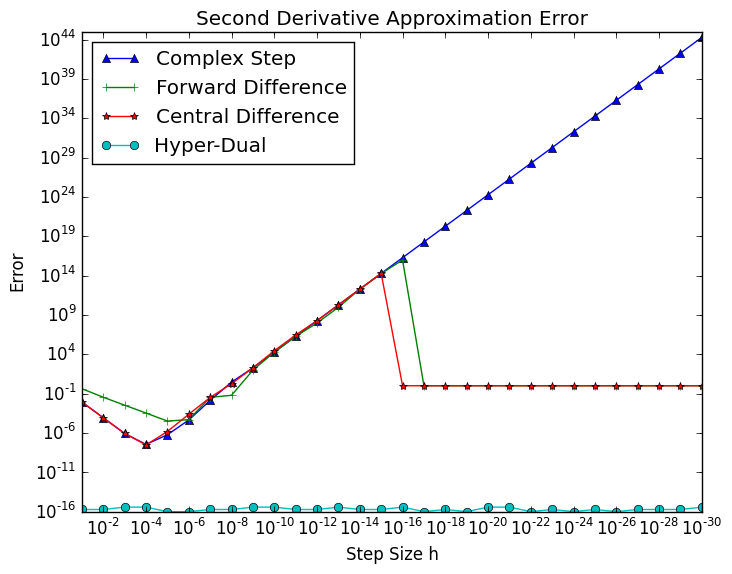

In [6]:
loglog(hvals, cs_error[:, 2],"-^", label="Complex Step")
loglog(hvals, fd_error[:, 2],"-+", label="Forward Difference")
loglog(hvals, cd_error[:, 2],"-*", label="Central Difference")
loglog(hvals, hd_error[:, 2],"-o", label="Hyper-Dual")
xlabel("Step Size h")
ylabel("Error")
title("Second Derivative Approximation Error")
legend(loc="upper left")
PyPlot.plt[:gca]()[:invert_xaxis]()